In [84]:
import numpy as np
import scipy.io
import xarray as xr
import os
import pandas as pd
from datetime import datetime, date, time, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import pandas as pd
from datetime import datetime, date, time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import numpy as np
import gsw 

from T_S_diagram import ts_diagram

from data_loading import get_LADCP
 


In [112]:
ds = get_LADCP(2012)


In [113]:
all_identical = True
for j in range(len(ds['depth']) - 1):
     LADCP1 = ds['depth'].isel(time=j)
     LADCP1p = ds['depth'].isel(time=j + 1)
     if not (LADCP1 == LADCP1p).all():
          all_identical = False
          print(f'Difference found at time index {j} between depth[{j}] and depth[{j + 1}]')
          break

if all_identical:
     print('All ds[\'depth\'] arrays are identical.')
else:
     print('Not all ds[\'depth\'] arrays are identical.')

print(ds['depth'].isel(time=2).values[26])
print(ds['depth'].isel(time=3).values[26])


Difference found at time index 0 between depth[0] and depth[1]
Not all ds['depth'] arrays are identical.
216.0
216.0


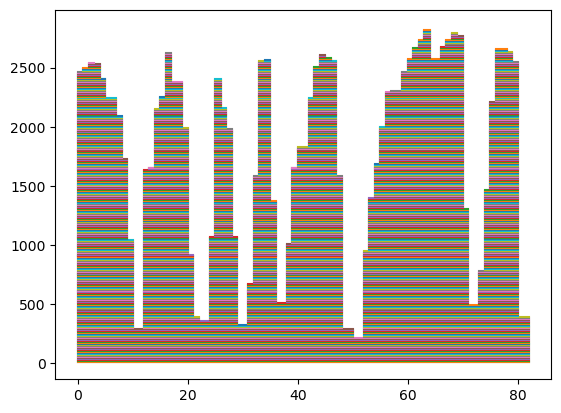

In [114]:
plt.plot(ds['depth'])

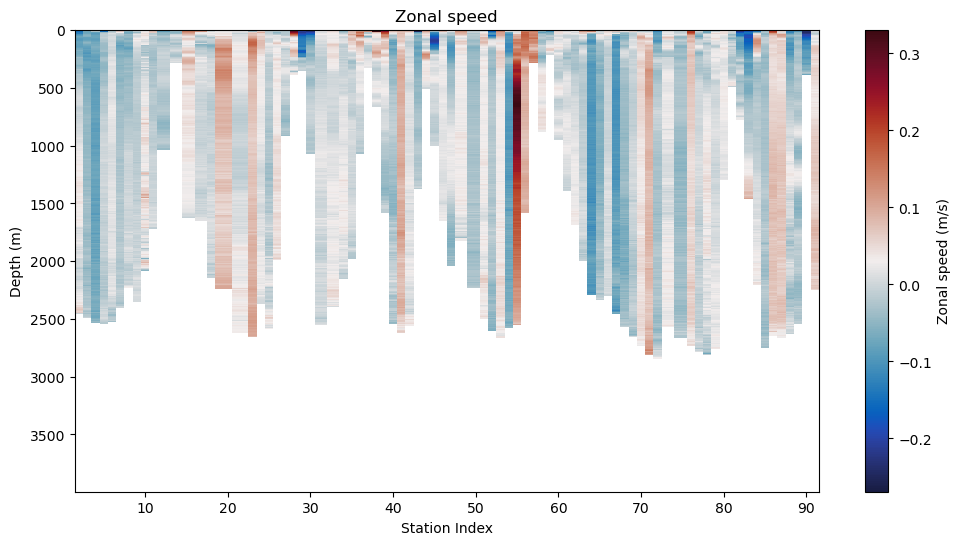

In [115]:
# Adjust depth to match the second dimension of ds['U']
depth = np.arange(ds['U'].shape[1]) * 8.  

# Mask NaN values in U
import numpy.ma as ma
masked_U = ma.masked_invalid(ds['U'].values)

# Plot speed
fig, ax = plt.subplots(figsize=(12, 6))

cmap = cmo.balance
cmap.set_bad(color='white')  # Set NaN values to white

# Plot for the entire depth range
c = ax.pcolormesh(ds['idx'], depth, masked_U.T, cmap=cmap, shading='nearest')  # Transpose masked_U if needed
ax.set_xlabel('Station Index')
ax.set_ylabel('Depth (m)')
ax.set_title('Zonal speed')
cbar = fig.colorbar(c)
cbar.set_label('Zonal speed (m/s)')
ax.invert_yaxis()
plt.show()


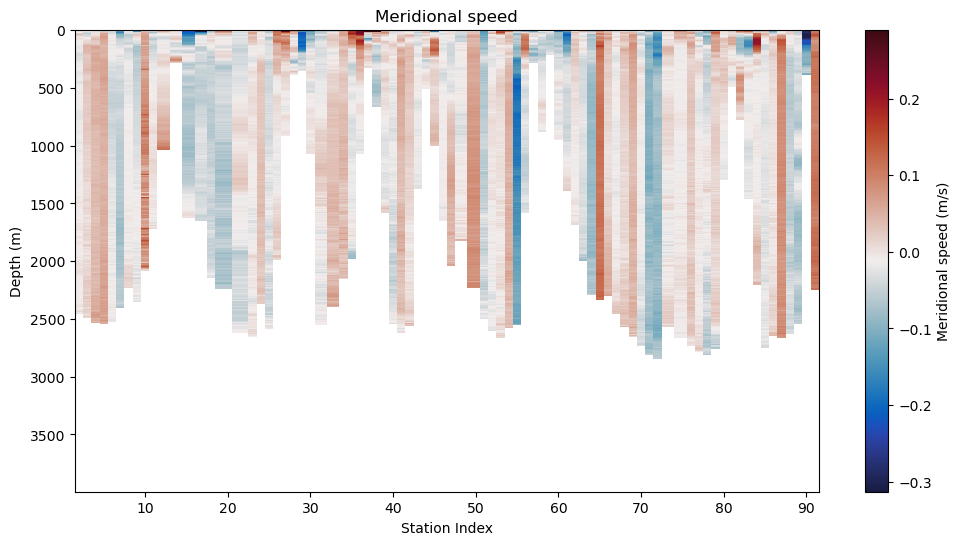

In [116]:
# Adjust depth to match the second dimension of ds['U']
depth = np.arange(ds['V'].shape[1]) * 8.  

# Mask NaN values in U
import numpy.ma as ma
masked_V = ma.masked_invalid(ds['V'].values)

# Plot speed
fig, ax = plt.subplots(figsize=(12, 6))

cmap = cmo.balance
cmap.set_bad(color='white')  # Set NaN values to white

# Plot for the entire depth range
c = ax.pcolormesh(ds['idx'], depth, masked_V.T, cmap=cmap, shading='nearest')  # Transpose masked_U if needed
ax.set_xlabel('Station Index')
ax.set_ylabel('Depth (m)')
ax.set_title('Meridional speed')
cbar = fig.colorbar(c)
cbar.set_label('Meridional speed (m/s)')
ax.invert_yaxis()
plt.show()
